In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [2]:
data=pd.read_csv('kc_house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
data.info()
#drop id; not usefull data
# condition, grade: unknown meaning/relevance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data.drop(['id','condition','grade'],axis=1).info()
data=data.drop(['id','condition','grade'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

In [6]:
#convert date, sqft_basement to data
#convert date
data['date']=pd.to_datetime(data['date'])
# convert basement
data=data[data['sqft_basement'] != '?']
data['sqft_basement']=data['sqft_basement'].astype(str).astype(float)
data.describe() #dropped rows with '?' in sqft_basement



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,18804.000000,21082.000000,21143.000000,21143.000000,21143.000000,17389.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,0.007552,0.233327,1789.069006,291.851724,1971.023223,82.991949,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,0.086573,0.765066,828.409769,442.498337,29.321938,398.481819,53.535756,0.138591,0.140597,685.67034,27169.273663
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,0.000000,0.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21143 non-null  datetime64[ns]
 1   price          21143 non-null  float64       
 2   bedrooms       21143 non-null  int64         
 3   bathrooms      21143 non-null  float64       
 4   sqft_living    21143 non-null  int64         
 5   sqft_lot       21143 non-null  int64         
 6   floors         21143 non-null  float64       
 7   waterfront     18804 non-null  float64       
 8   view           21082 non-null  float64       
 9   sqft_above     21143 non-null  int64         
 10  sqft_basement  21143 non-null  float64       
 11  yr_built       21143 non-null  int64         
 12  yr_renovated   17389 non-null  float64       
 13  zipcode        21143 non-null  int64         
 14  lat            21143 non-null  float64       
 15  long           2114

In [8]:
#waterfront, view, yr_renovated: missing data

In [9]:
data.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,18804.000000,21082.000000,21143.000000,21143.000000,21143.000000,17389.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,0.007552,0.233327,1789.069006,291.851724,1971.023223,82.991949,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,0.086573,0.765066,828.409769,442.498337,29.321938,398.481819,53.535756,0.138591,0.140597,685.67034,27169.273663
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,0.000000,0.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


In [10]:
#view only missing a small number of data so drop missing rows
data=data[data['view'] .isnull()==False] #drop missing 'view' data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21082 non-null  datetime64[ns]
 1   price          21082 non-null  float64       
 2   bedrooms       21082 non-null  int64         
 3   bathrooms      21082 non-null  float64       
 4   sqft_living    21082 non-null  int64         
 5   sqft_lot       21082 non-null  int64         
 6   floors         21082 non-null  float64       
 7   waterfront     18749 non-null  float64       
 8   view           21082 non-null  float64       
 9   sqft_above     21082 non-null  int64         
 10  sqft_basement  21082 non-null  float64       
 11  yr_built       21082 non-null  int64         
 12  yr_renovated   17340 non-null  float64       
 13  zipcode        21082 non-null  int64         
 14  lat            21082 non-null  float64       
 15  long           2108

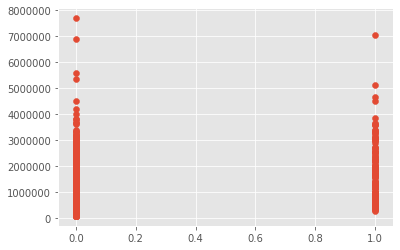

In [12]:
plt.scatter(data['waterfront'],data['price'])

In [13]:
#can't average a 'binary' so dropping missing data
data=data[data['waterfront'] .isnull()==False] # drop missing 'waterfront' data, rows

In [14]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18749 entries, 1 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           18749 non-null  datetime64[ns]
 1   price          18749 non-null  float64       
 2   bedrooms       18749 non-null  int64         
 3   bathrooms      18749 non-null  float64       
 4   sqft_living    18749 non-null  int64         
 5   sqft_lot       18749 non-null  int64         
 6   floors         18749 non-null  float64       
 7   waterfront     18749 non-null  float64       
 8   view           18749 non-null  float64       
 9   sqft_above     18749 non-null  int64         
 10  sqft_basement  18749 non-null  float64       
 11  yr_built       18749 non-null  int64         
 12  yr_renovated   15429 non-null  float64       
 13  zipcode        18749 non-null  int64         
 14  lat            18749 non-null  float64       
 15  long           1874

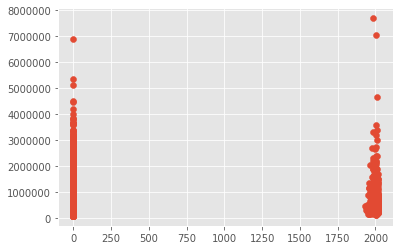

In [15]:
plt.scatter(data['yr_renovated'],data['price'])

In [16]:
data=data[data['yr_renovated'] .isnull()==False] # drop missing 'yr_renovated' data, rows

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           15429 non-null  datetime64[ns]
 1   price          15429 non-null  float64       
 2   bedrooms       15429 non-null  int64         
 3   bathrooms      15429 non-null  float64       
 4   sqft_living    15429 non-null  int64         
 5   sqft_lot       15429 non-null  int64         
 6   floors         15429 non-null  float64       
 7   waterfront     15429 non-null  float64       
 8   view           15429 non-null  float64       
 9   sqft_above     15429 non-null  int64         
 10  sqft_basement  15429 non-null  float64       
 11  yr_built       15429 non-null  int64         
 12  yr_renovated   15429 non-null  float64       
 13  zipcode        15429 non-null  int64         
 14  lat            15429 non-null  float64       
 15  long           1542

In [18]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.542900e+04,15429.000000,15429.000000,15429.00000,1.542900e+04,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.00000,15429.000000,15429.000000
mean,5.414978e+05,3.378767,2.121508,2085.51656,1.528616e+04,1.494556,0.007518,0.228855,1793.705230,291.811329,1971.130533,81.766544,98077.472098,47.559260,-122.21351,1990.926891,12862.281159
std,3.730219e+05,0.934200,0.767027,919.54924,4.199737e+04,0.538903,0.086384,0.759902,829.165362,443.366153,29.287947,395.668685,53.459610,0.138745,0.14048,684.796238,27783.533647
min,8.200000e+04,1.000000,0.500000,370.00000,5.200000e+02,1.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.51900,399.000000,659.000000
25%,3.200000e+05,3.000000,1.750000,1430.00000,5.050000e+03,1.000000,0.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469100,-122.32800,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.00000,7.620000e+03,1.500000,0.000000,0.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571100,-122.22900,1850.000000,7626.000000
75%,6.435000e+05,4.000000,2.500000,2550.00000,1.072000e+04,2.000000,0.000000,0.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677600,-122.12400,2370.000000,10108.000000
max,7.700000e+06,33.000000,8.000000,13540.00000,1.651359e+06,3.500000,1.000000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.31500,6210.000000,871200.000000


count                   15429
unique                    369
top       2014-06-25 00:00:00
freq                      102
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

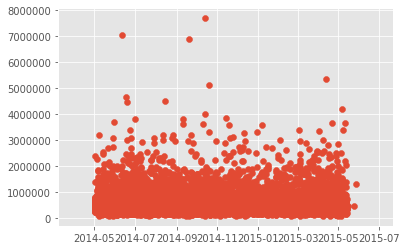

In [19]:
plt.scatter(data['date'],data['price'])
data['date'].describe()
#no apperent correlation between date of sale and price

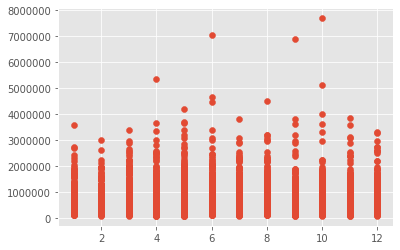

In [20]:
data['month'] = pd.DatetimeIndex(data['date']).month #add month variable
plt.scatter(data['month'],data['price'])


In [21]:
data[['month','price']].corr()

,month,price
month,1.000000,-0.008817
price,-0.008817,1.000000


In [22]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,5
8,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2015-02-19,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,2
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6


In [23]:
# test for colleations in the variables
df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

#correlated variables
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876449
"(sqft_living, sqft_living15)",0.756714
"(bathrooms, sqft_living)",0.753180


In [24]:
#drop sqft_living since it is correlated with 3 other veriable
data=data.drop('sqft_living',axis=1) #drop sqft_living, sqft_above and sqft_living15 can act as proxies and are uncorrelated


In [25]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month'],
      dtype='object')

In [26]:
data.corr()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
price,1.000000,0.305792,0.525655,0.084687,0.260143,0.275718,0.397786,0.612374,0.320053,0.050528,0.120981,-0.049371,0.306991,0.021948,0.583400,0.080569,-0.008817
bedrooms,0.305792,1.000000,0.511478,0.025216,0.182026,-0.003162,0.082774,0.473552,0.301747,0.155152,0.018001,-0.145820,-0.004816,0.128920,0.389219,0.024887,-0.007001
bathrooms,0.525655,0.511478,1.000000,0.080290,0.507405,0.066672,0.182342,0.685538,0.280042,0.506293,0.046817,-0.199400,0.031480,0.222446,0.569717,0.083032,0.007423
sqft_lot,0.084687,0.025216,0.080290,1.000000,-0.010053,0.025439,0.077358,0.173922,0.016843,0.051962,0.000854,-0.128448,-0.082795,0.231719,0.143464,0.716502,-0.003783
floors,0.260143,0.182026,0.507405,-0.010053,1.000000,0.017587,0.028130,0.529901,-0.242148,0.487970,-0.001473,-0.057957,0.058336,0.130350,0.283276,-0.014227,0.012664
waterfront,0.275718,-0.003162,0.066672,0.025439,0.017587,1.000000,0.407260,0.077547,0.089348,-0.023061,0.083825,0.029253,-0.015151,-0.040609,0.092188,0.029103,0.015235
view,0.397786,0.082774,0.182342,0.077358,0.028130,0.407260,1.000000,0.172230,0.273648,-0.055113,0.095539,0.085805,0.007946,-0.075634,0.278924,0.071488,-0.000430
sqft_above,0.612374,0.473552,0.685538,0.173922,0.529901,0.077547,0.172230,1.000000,-0.052388,0.420425,0.017216,-0.256406,0.010884,0.341662,0.732228,0.186480,0.009489
sqft_basement,0.320053,0.301747,0.280042,0.016843,-0.242148,0.089348,0.273648,-0.052388,1.000000,-0.130957,0.067813,0.074359,0.104531,-0.143361,0.200056,0.019314,0.004198
yr_built,0.050528,0.155152,0.506293,0.051962,0.487970,-0.023061,-0.055113,0.420425,-0.130957,1.000000,-0.220813,-0.344650,-0.144573,0.407867,0.321923,0.071544,-0.005339


In [27]:
# double check for correlations
df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

#correlated variables
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,


In [28]:
data

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
1,2014-12-09,538000.0,3,2.25,7242,2.0,0.0,0.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
3,2014-12-09,604000.0,4,3.00,5000,1.0,0.0,0.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,2015-02-18,510000.0,3,2.00,8080,1.0,0.0,0.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2
5,2014-05-12,1230000.0,4,4.50,101930,1.0,0.0,0.0,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,5
8,2015-04-15,229500.0,3,1.00,7470,1.0,0.0,0.0,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2015-02-19,475000.0,3,2.50,1294,2.0,0.0,0.0,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,2
21592,2014-05-21,360000.0,3,2.50,1131,3.0,0.0,0.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5
21593,2015-02-23,400000.0,4,2.50,5813,2.0,0.0,0.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2
21594,2014-06-23,402101.0,2,0.75,1350,2.0,0.0,0.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6


In [29]:
# data.applymap(np.isreal)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           15429 non-null  datetime64[ns]
 1   price          15429 non-null  float64       
 2   bedrooms       15429 non-null  int64         
 3   bathrooms      15429 non-null  float64       
 4   sqft_lot       15429 non-null  int64         
 5   floors         15429 non-null  float64       
 6   waterfront     15429 non-null  float64       
 7   view           15429 non-null  float64       
 8   sqft_above     15429 non-null  int64         
 9   sqft_basement  15429 non-null  float64       
 10  yr_built       15429 non-null  int64         
 11  yr_renovated   15429 non-null  float64       
 12  zipcode        15429 non-null  int64         
 13  lat            15429 non-null  float64       
 14  long           15429 non-null  float64       
 15  sqft_living15  1542

In [34]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
dtype: int64

In [ ]:
FEUTURE ENGINEERING

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,age
price,1.000000,0.305792,0.525655,0.084687,0.260143,0.275718,0.397786,0.612374,0.320053,0.050528,0.120981,-0.049371,0.306991,0.021948,0.583400,0.080569,-0.008817,-0.050443
bedrooms,0.305792,1.000000,0.511478,0.025216,0.182026,-0.003162,0.082774,0.473552,0.301747,0.155152,0.018001,-0.145820,-0.004816,0.128920,0.389219,0.024887,-0.007001,-0.155184
bathrooms,0.525655,0.511478,1.000000,0.080290,0.507405,0.066672,0.182342,0.685538,0.280042,0.506293,0.046817,-0.199400,0.031480,0.222446,0.569717,0.083032,0.007423,-0.506622
sqft_lot,0.084687,0.025216,0.080290,1.000000,-0.010053,0.025439,0.077358,0.173922,0.016843,0.051962,0.000854,-0.128448,-0.082795,0.231719,0.143464,0.716502,-0.003783,-0.051849
floors,0.260143,0.182026,0.507405,-0.010053,1.000000,0.017587,0.028130,0.529901,-0.242148,0.487970,-0.001473,-0.057957,0.058336,0.130350,0.283276,-0.014227,0.012664,-0.488233
waterfront,0.275718,-0.003162,0.066672,0.025439,0.017587,1.000000,0.407260,0.077547,0.089348,-0.023061,0.083825,0.029253,-0.015151,-0.040609,0.092188,0.029103,0.015235,0.022897
view,0.397786,0.082774,0.182342,0.077358,0.028130,0.407260,1.000000,0.172230,0.273648,-0.055113,0.095539,0.085805,0.007946,-0.075634,0.278924,0.071488,-0.000430,0.055078
sqft_above,0.612374,0.473552,0.685538,0.173922,0.529901,0.077547,0.172230,1.000000,-0.052388,0.420425,0.017216,-0.256406,0.010884,0.341662,0.732228,0.186480,0.009489,-0.420710
sqft_basement,0.320053,0.301747,0.280042,0.016843,-0.242148,0.089348,0.273648,-0.052388,1.000000,-0.130957,0.067813,0.074359,0.104531,-0.143361,0.200056,0.019314,0.004198,0.130731
yr_built,0.050528,0.155152,0.506293,0.051962,0.487970,-0.023061,-0.055113,0.420425,-0.130957,1.000000,-0.220813,-0.344650,-0.144573,0.407867,0.321923,0.071544,-0.005339,-0.999873


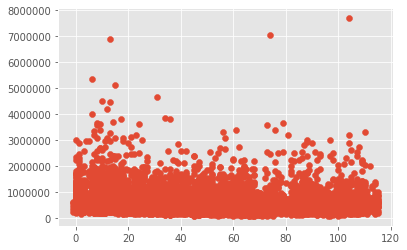

In [49]:


#ideas
# date isnt usfull; can't sell in the past
#look at ratio of bed/bath
data['age'] = data['date'].dt.year-data['yr_built']
data.head()

plt.scatter(data['age'],data['price'])
data.corr() #highly correlated with yr_built


In [59]:
# try yr_renovated as dummy i.e. 1=renovated since built, 0=no renovation
renovated_du=[]
for i in data['yr_renovated']:
    if i==0:
        renovated_du.append(i)
    elif i>0:
        renovated_du.append(1)
        
len(renovated_du)        
len(data['yr_renovated']) 
data['renovated_dummy']=renovated_du

In [60]:
data['renovated_dummy'].describe()

count    15429.000000
mean         0.040962
std          0.198208
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: renovated_dummy, dtype: float64

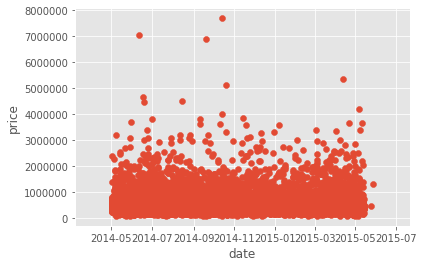

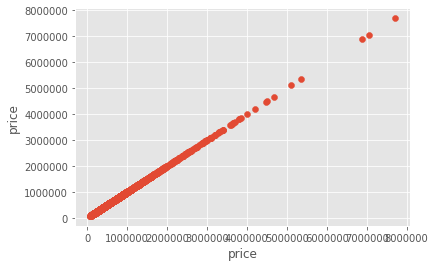

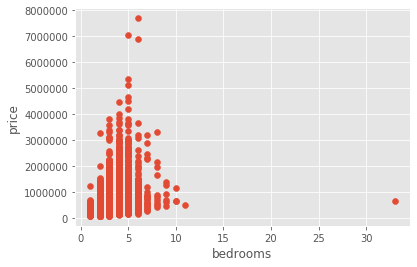

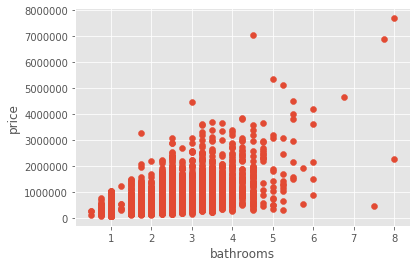

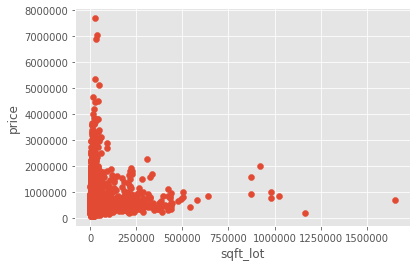

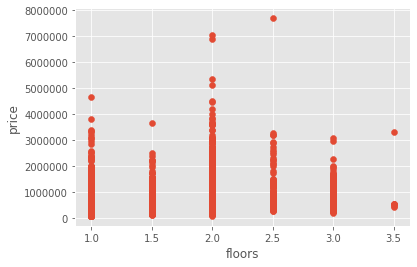

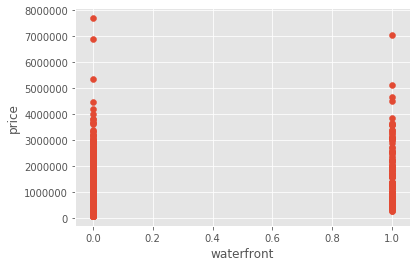

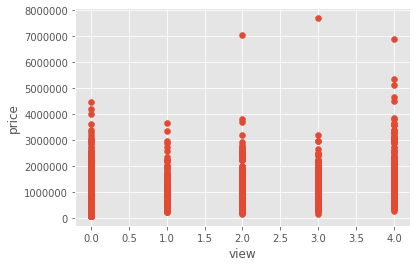

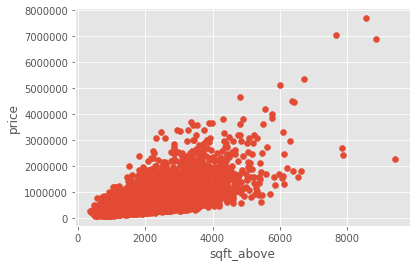

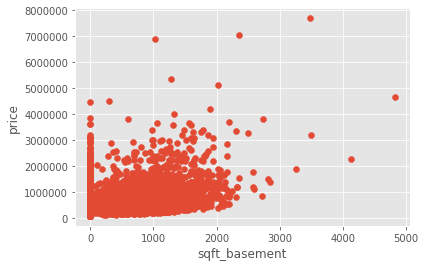

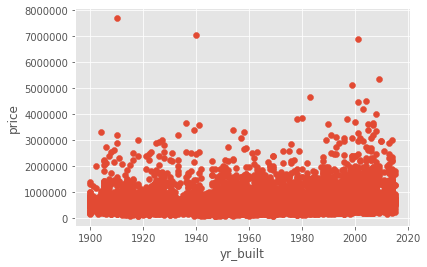

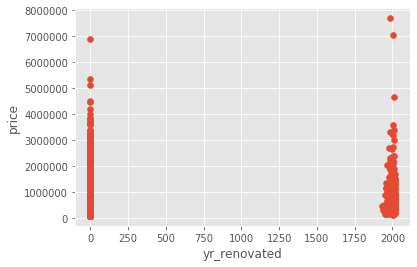

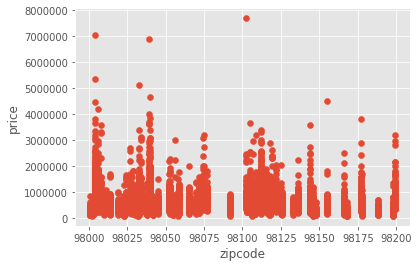

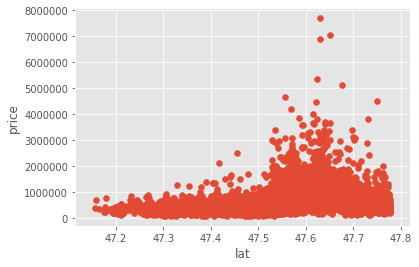

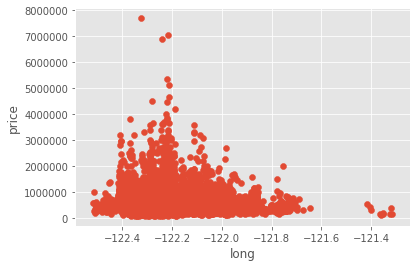

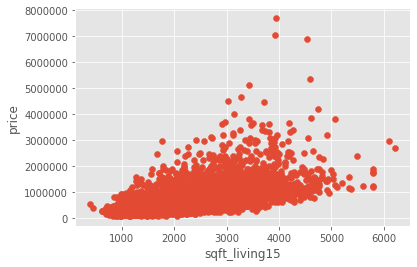

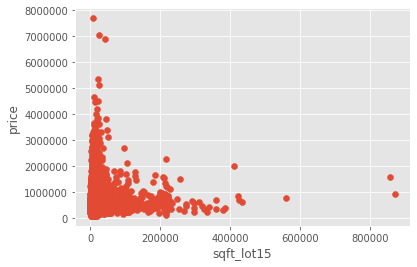

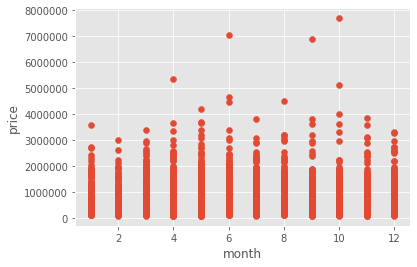

In [30]:
for column in data:
    plt.scatter(data[column],data['price'])
    plt.xlabel(column)
    plt.ylabel('price')
    plt.show()

In [ ]:
# ptenteial catagory date
# month, zipcode, yr_renovated, view?, waterfront, floors?

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


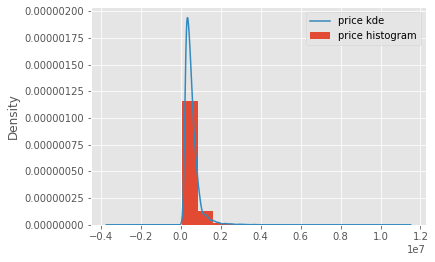

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


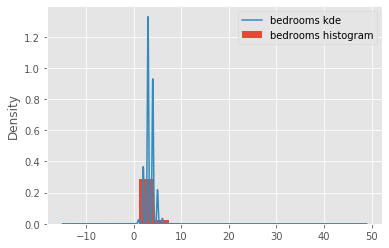

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


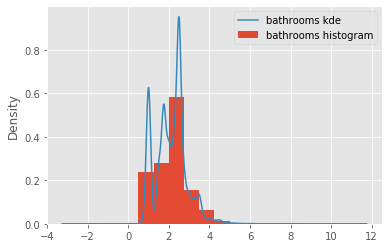

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


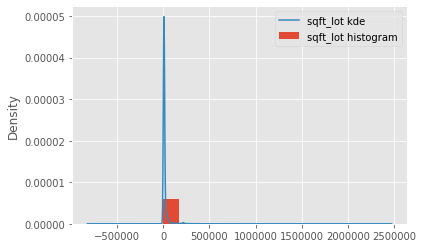

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


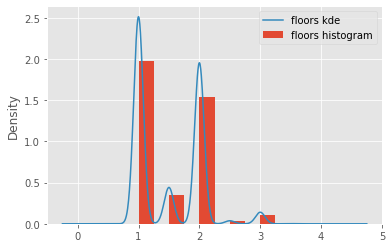

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


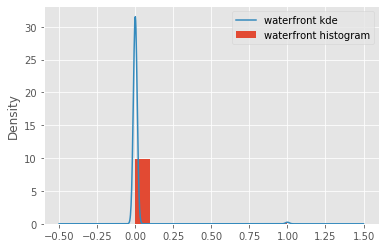

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


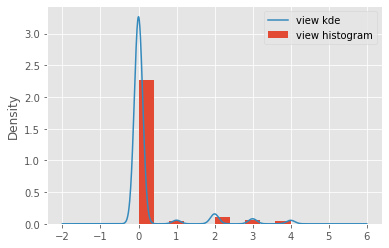

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


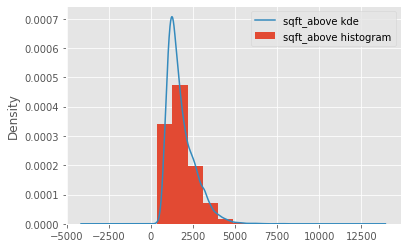

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


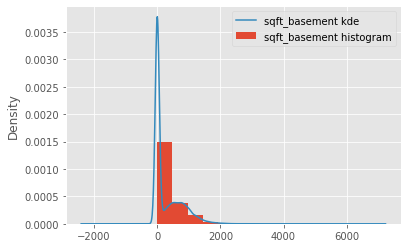

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


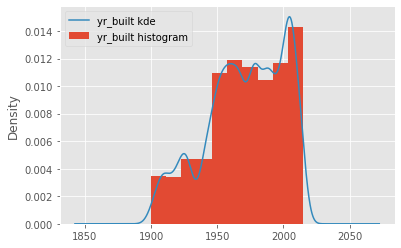

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


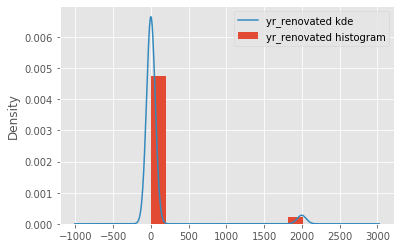

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


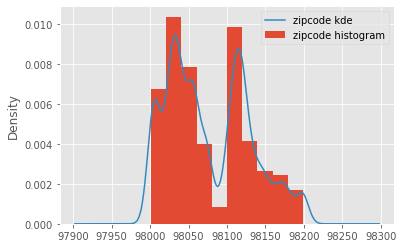

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


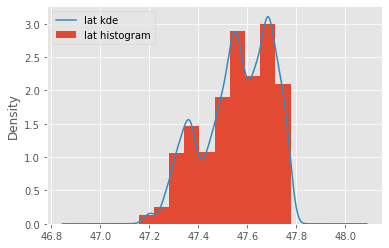

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


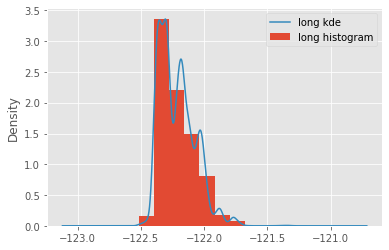

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


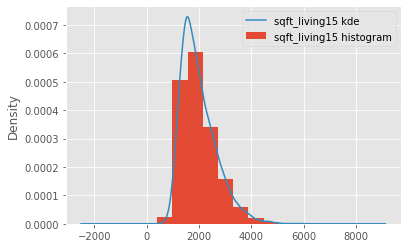

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


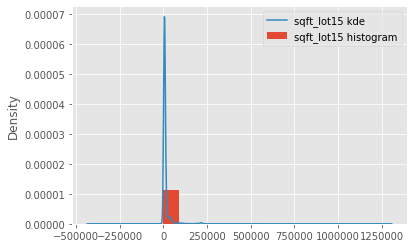

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


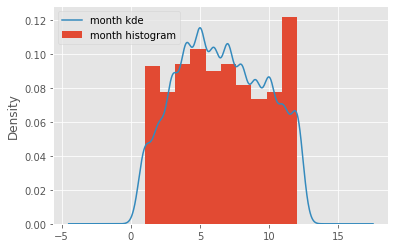

In [150]:
for column in data:
    data[column].plot.hist(normed=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [ ]:
# experiment: deltet later: need to get linear and normal data